In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/state-wise-power-consumption-in-india/dataset_tk.csv')

In [3]:
df.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [4]:
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

df = df[['Date', 'Delhi']]

df.head()

,Date,Delhi
0,02/01/2019 00:00:00,85.8
1,03/01/2019 00:00:00,85.5
2,04/01/2019 00:00:00,83.5
3,05/01/2019 00:00:00,79.2
4,06/01/2019 00:00:00,76.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    503 non-null    object 
 1   Delhi   503 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [6]:
df.isnull().sum()

Date     0
Delhi    0
dtype: int64

In [7]:
df = df.drop_duplicates(subset='Date', keep='first')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.set_index(['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 498 entries, 2019-01-02 to 2020-12-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Delhi   498 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [9]:
df_day = df.asfreq('D')

In [10]:
df_day.groupby(df_day.index.year).apply(lambda x: x.isna().sum())

,Delhi
Date,
2019,10
2020,196


In [11]:
df = df[df.index.year == 2019]

In [12]:
df = df.asfreq('D').interpolate()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2019-01-02 to 2019-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Delhi   364 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


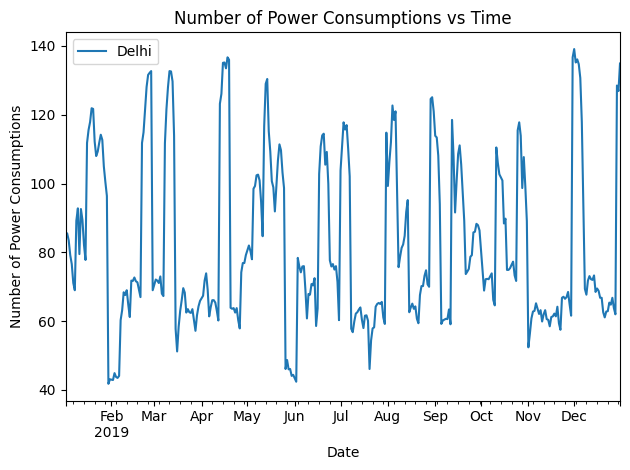

In [14]:
df.plot()
plt.title("Number of Power Consumptions vs Time")
plt.xlabel("Date")
plt.ylabel("Number of Power Consumptions")
plt.tight_layout()
plt.show()

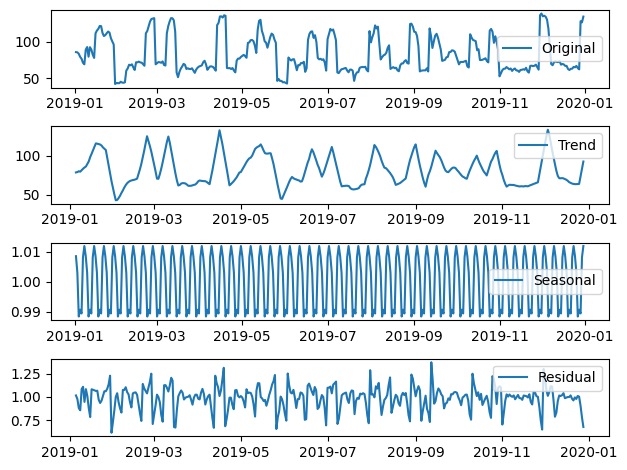

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposed = seasonal_decompose(df, model = 'multiplicative')

# Access the individual components
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original time series
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [16]:
import matplotlib.cm as cm

df['Day'] = df.index.day
df['Month'] = df.index.month

# Get unique years
months = df['Month'].unique()

# Create a colormap for the years
colors = cm.rainbow_r([i / len(months) for i in range(len(months))])

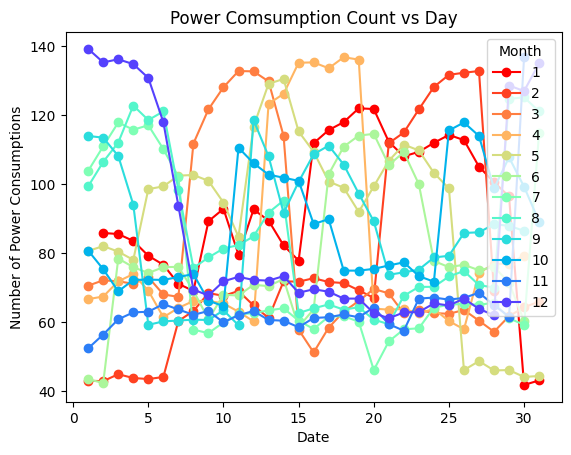

In [17]:
fig, ax = plt.subplots()

for month, color in zip(months, colors):
    data = df[df['Month'] == month]
    ax.plot(data['Day'], data['Delhi'], label=str(month), color=color, marker='o')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Power Consumptions')
ax.set_title('Power Comsumption Count vs Day')
ax.legend(title='Month')
plt.show()

In [18]:
df['Day'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
      dtype=int32)

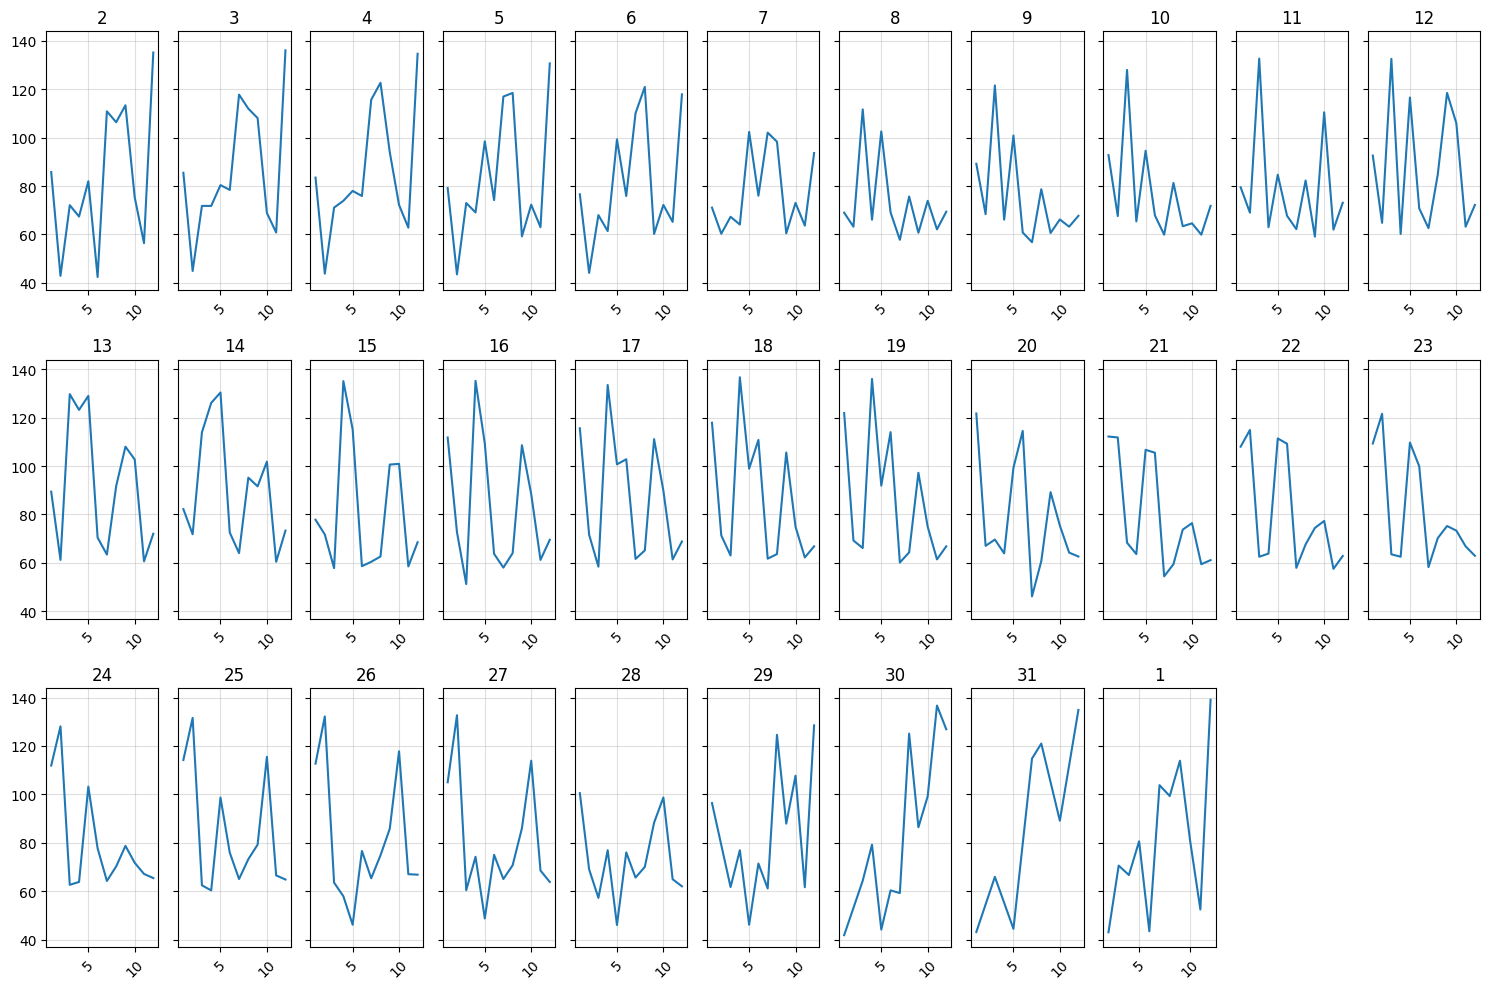

In [19]:
import calendar

n_rows = 3
n_days = len(df['Day'].unique())
n_cols = -(-n_days // n_rows) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharey=True)
axes = axes.flatten() 

for i, day in enumerate(df['Day'].unique()):
    data = df[df['Day'] == day]
    ax = axes[i]
    ax.plot(data['Month'], data['Delhi'])
    ax.set_title(day)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(alpha=0.4)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

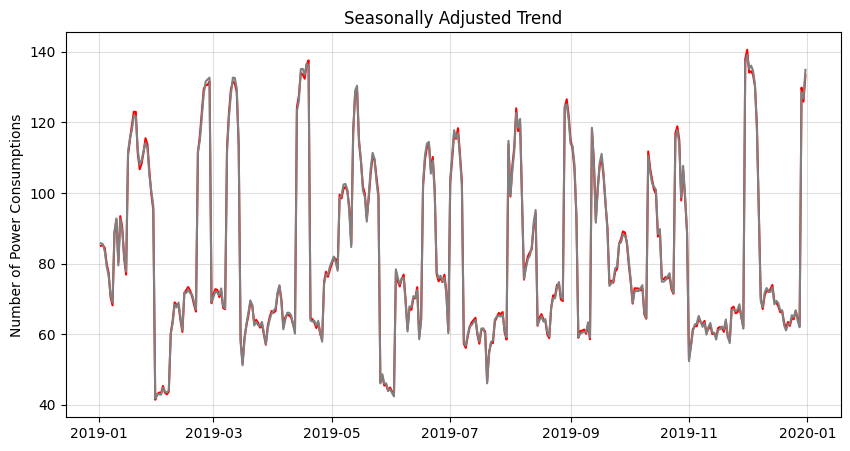

In [20]:
seasonally_adjusted_trend = df['Delhi'] / seasonal

# Plot the seasonally adjusted trend
plt.figure(figsize=(10, 5))
plt.plot(seasonally_adjusted_trend, color = 'red', label = '')
plt.plot(df.index, df['Delhi'], color='gray')

plt.ylabel('Number of Power Consumptions')
plt.title('Seasonally Adjusted Trend')
plt.grid(alpha = 0.4)
plt.show()

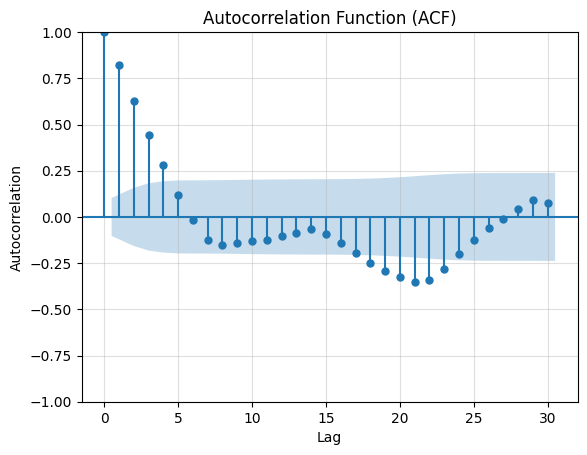

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

data = df['Delhi']

# Plot the ACF
plot_acf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(alpha = 0.4)
plt.show()

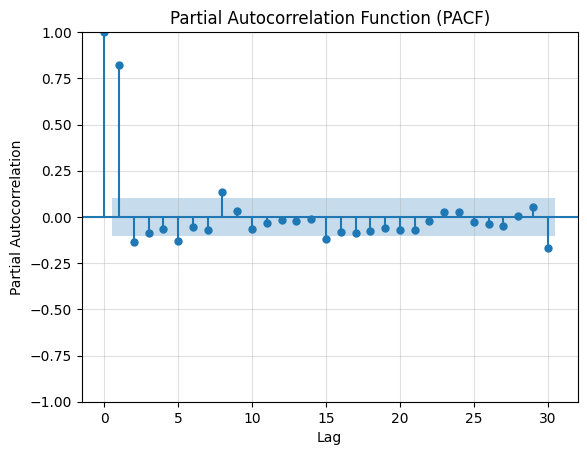

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf

data = df['Delhi']

# Plot the PACF
plot_pacf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(alpha = 0.4)
plt.show()

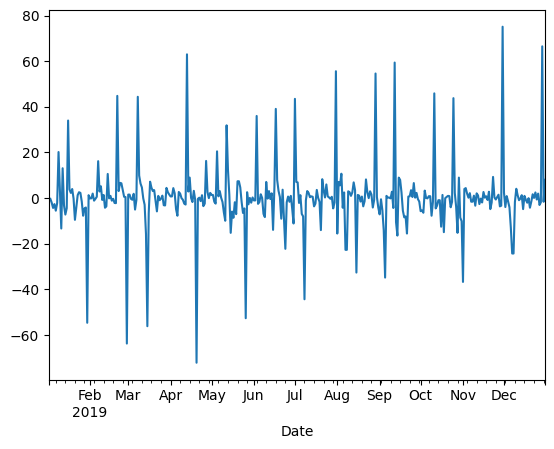

In [23]:
df['Delhi'].diff().plot()
plt.show()

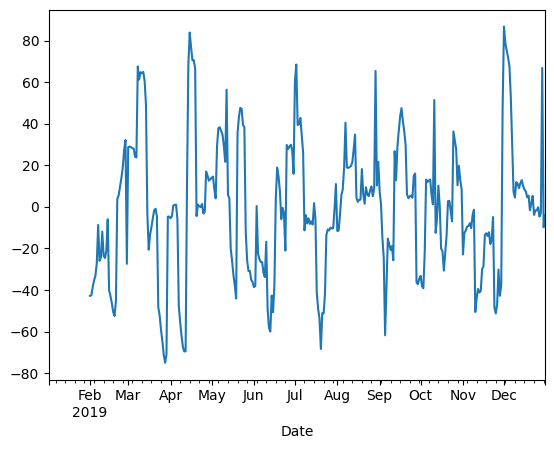

In [24]:
df['Delhi'].diff(30).plot()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(df['Delhi'].diff(30).dropna())

# Extract and print the test statistic
print('Test Statistic:', result[0])

# Extract and print the p-value
print('p-value:', result[1])

# Extract and print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

Test Statistic: -5.0878729318105105
p-value: 1.482787360302033e-05
Critical Values:
1%: -3.451082300831733
5%: -2.87067210822307
10%: -2.5716355136268345


In [26]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.2 MB/s eta 0:00:00


In [27]:
from pmdarima import auto_arima

arima_model=auto_arima(df['Delhi'],
                       start_p=1,d=1,start_q=1,
                       max_p=4,max_q=4,max_d=4,m=30,
                       start_P=1,D=1,start_Q=1,max_P=4,max_D=4,max_Q=4,
                       seasonal=True,
                       trace=True,
                       error_action="ignore",
                       stepwise=True,
                       n_fits=20)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[30]             : AIC=inf, Time=4.78 sec
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=2938.591, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=2866.658, Time=0.76 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=inf, Time=2.92 sec
 ARIMA(1,1,0)(0,1,0)[30]             : AIC=2939.440, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[30]             : AIC=2835.326, Time=2.65 sec
 ARIMA(1,1,0)(3,1,0)[30]             : AIC=2825.398, Time=9.30 sec
 ARIMA(1,1,0)(4,1,0)[30]             : AIC=2820.829, Time=14.94 sec
 ARIMA(1,1,0)(4,1,1)[30]             : AIC=inf, Time=79.85 sec
 ARIMA(1,1,0)(3,1,1)[30]             : AIC=inf, Time=46.31 sec
 ARIMA(0,1,0)(4,1,0)[30]             : AIC=2818.901, Time=12.68 sec
 ARIMA(0,1,0)(3,1,0)[30]             : AIC=2823.562, Time=7.73 sec
 ARIMA(0,1,0)(4,1,1)[30]             : AIC=inf, Time=73.35 sec
 ARIMA(0,1,0)(3,1,1)[30]             : AIC=inf, Time=39.18 sec
 ARIMA(0,1,1)(4,1,0)[30]             : AIC=

In [28]:
train_end = '2019-10-31'
test_start = '2019-11-01'

df_train = df[:train_end]
df_test = df[test_start:]

In [29]:
df_train.index = pd.DatetimeIndex(df_train.index.values,
                               freq=df_train.index.inferred_freq)

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_train['Delhi'],
             order=(0,1,1),
             seasonal_order=(2,1,0,30),
             seasonal = True,
             m = 30
             )
result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83241D+00    |proj g|=  2.29862D-02


 This problem is unconstrained.



At iterate    5    f=  3.81516D+00    |proj g|=  7.52860D-02

At iterate   10    f=  3.80421D+00    |proj g|=  1.81937D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   1.929D-07   3.804D+00
  F =   3.8042059905668943     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Delhi   No. Observations:                  303
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 30)   Log Likelihood               -1152.674
Date:                             Thu, 05 Sep 2024   AIC                           2313.349
Time:                                     16:07:29   BIC                           2327.772
Sample:                                 01-02-2019   HQIC                          2319.139
                                      - 10-31-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0133      0.059     -0.224      0.823      -0.130       0.103
ar.S.L30      -0.6123      0.048    -12.846      0.000      -0.706      -0.519
ar.S.L60      -0.3394      0.056     -6.051      0.000      -0.449      -0.229
sigma2       266.3622     13.314     20.006      0.000     240.267     292.457
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               213.13
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.46
Prob(H) (two-sided):                  0.25   Kurtosis:                         7.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
prediction=result.predict(0,len(df)-1)

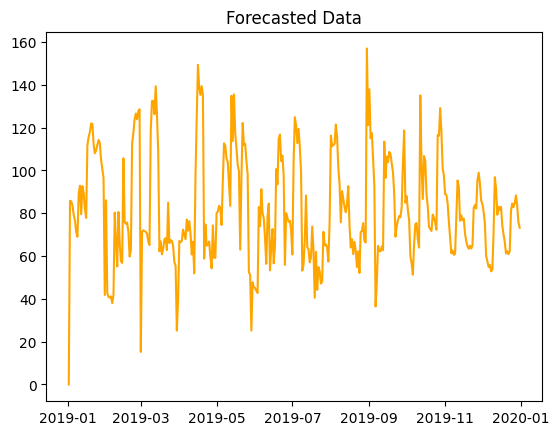

In [32]:
plt.plot(prediction, color= 'orange')
plt.title("Forecasted Data")
plt.show()

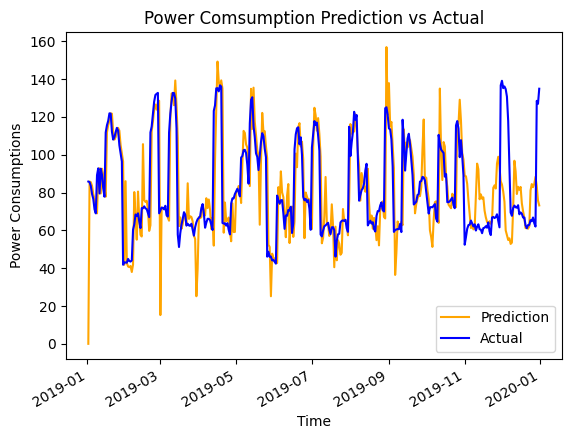

In [33]:
plt.plot(prediction, color='orange', label='Prediction')
df['Delhi'].plot(color='blue', label='Actual')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Power Consumptions')
plt.title('Power Comsumption Prediction vs Actual')

plt.show()

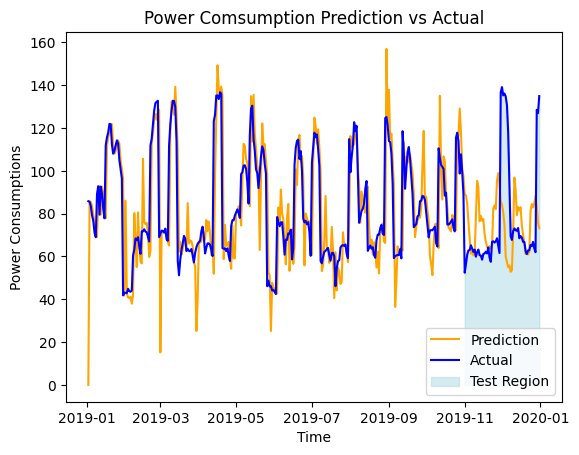

In [34]:
plt.plot(df.index, prediction, color='orange', label='Prediction')
plt.plot(df.index, df['Delhi'], color='blue', label='Actual')

plt.fill_between(df.index, df['Delhi'], where=(df.index >= test_start) & (df.index.year < 2020), color='lightblue', alpha=0.5, label='Test Region')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Power Consumptions')
plt.title('Power Comsumption Prediction vs Actual')

plt.show()